In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df=pd.read_csv("medicalmalpractice.csv")
df.head(10)


,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female
5,75368,9,71,1,2,Internal Medicine,Medicare/Medicaid,Female
6,97437,7,50,1,2,Internal Medicine,Unknown,Male
7,20422,3,58,0,4,Anesthesiology,Medicare/Medicaid,Male
8,849081,6,37,1,0,Emergency Medicine,Private,Male
9,131253,3,34,0,2,Ophthamology,No Insurance,Female


Checking the shape of the dataframe

In [123]:
print(df.shape)

(79210, 8)


In [124]:
df.nunique()

Amount              67695
Severity                9
Age                    88
Private Attorney        2
Marital Status          5
Specialty              20
Insurance               5
Gender                  2
dtype: int64

In [125]:
# Display the information about the data types, Missing values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            79210 non-null  int64 
 1   Severity          79210 non-null  int64 
 2   Age               79210 non-null  int64 
 3   Private Attorney  79210 non-null  int64 
 4   Marital Status    79210 non-null  int64 
 5   Specialty         79210 non-null  object
 6   Insurance         79210 non-null  object
 7   Gender            79210 non-null  object
dtypes: int64(5), object(3)
memory usage: 4.8+ MB


In [126]:
#checking if there is null values
df.isnull().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

In [127]:
#Looking at the summary and count of the data
df.describe(include = "all")

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
count,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210,79210,79210
unique,NaN,NaN,NaN,NaN,NaN,20,5,2
top,NaN,NaN,NaN,NaN,NaN,Family Practice,Private,Female
freq,NaN,NaN,NaN,NaN,NaN,11436,34289,47770
mean,157484.554816,4.799659,42.701868,0.660889,1.889559,NaN,NaN,NaN
std,193135.093293,2.083439,19.811063,0.473411,1.002502,NaN,NaN,NaN
min,1576.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,43670.250000,3.000000,28.000000,0.000000,1.000000,NaN,NaN,NaN
50%,98131.000000,4.000000,43.000000,1.000000,2.000000,NaN,NaN,NaN
75%,154675.250000,7.000000,58.000000,1.000000,2.000000,NaN,NaN,NaN


In [128]:
df.groupby('Specialty')['Amount'].median()

Specialty
Anesthesiology             37537.5
Cardiology                 93012.0
Dermatology               202331.0
Emergency Medicine         70716.0
Family Practice           118780.5
General Surgery           102459.5
Internal Medicine          82041.0
Neurology/Neurosurgery    123497.0
OBGYN                     133160.0
Occupational Medicine     107646.0
Ophthamology               80128.0
Orthopedic Surgery         91334.5
Pathology                 106504.5
Pediatrics                278859.0
Physical Medicine          98678.5
Plastic Surgeon           103027.5
Radiology                  32453.0
Resident                   94886.0
Thoracic Surgery           93818.0
Urological Surgery        162435.0
Name: Amount, dtype: float64

In [129]:
numerical_data = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation = numerical_data.corr()
print(correlation)

                    Amount  Severity       Age  Private Attorney  \
Amount            1.000000  0.337163 -0.105293          0.261905   
Severity          0.337163  1.000000 -0.053878          0.297529   
Age              -0.105293 -0.053878  1.000000         -0.095019   
Private Attorney  0.261905  0.297529 -0.095019          1.000000   
Marital Status   -0.185488 -0.100711  0.251928         -0.119135   

                  Marital Status  
Amount                 -0.185488  
Severity               -0.100711  
Age                     0.251928  
Private Attorney       -0.119135  
Marital Status          1.000000  


It can be seen that there is a positive correlation of 0.337163 of severity to amount which means the higher the severity the higher the insurance claims which is logical. Usually higher age would result in a higher claim amount as risks are higher, but the results has shown that there is a negative correlation between age and amount.Most importantly, Private Attorney has a positive correlation of 0.261905, which means that claimants with legal status involved are having a higher medical claim amount, which is what we will investigate more into.

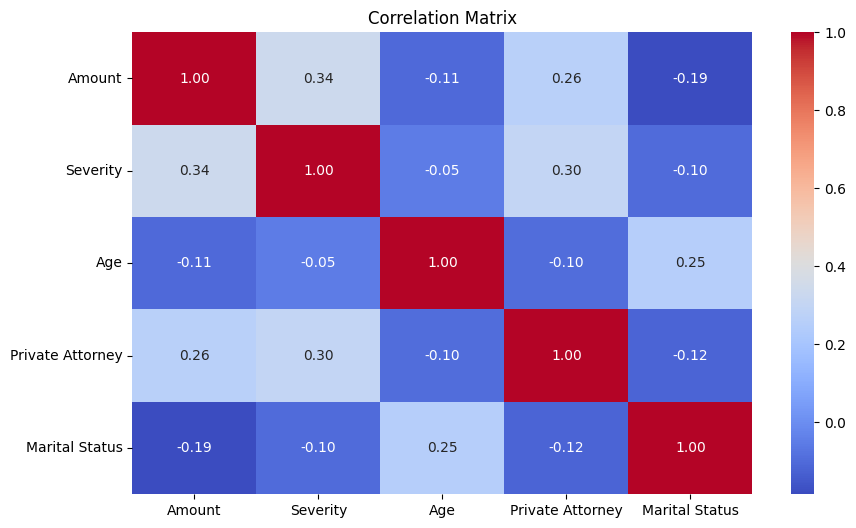

In [130]:
    #The heatmap for it
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

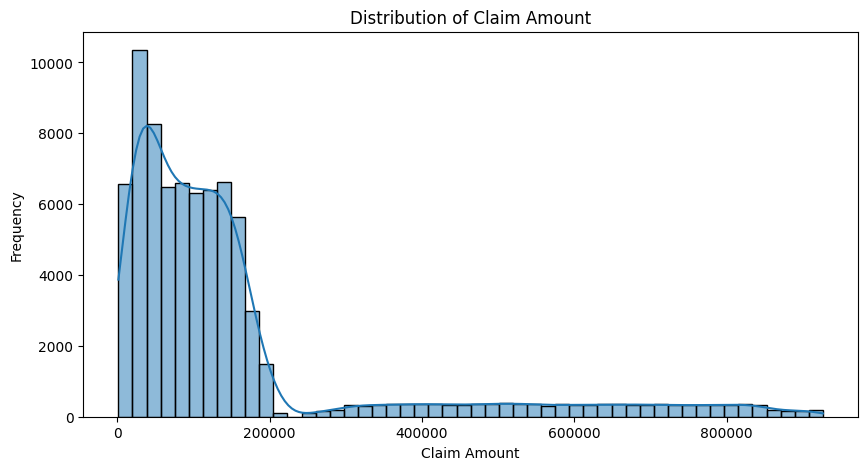

In [131]:
#Identifying the distribution of the claim amount
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Claim Amount')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()

As shown in the plot, the distribution of the claim amount is positively skewed with most claim amounts being in the lower end with few very large claim amounts on the higher end.

In [132]:
for specialty in df['Specialty'].unique():
    specialty_data = df[df['Specialty'] == specialty]['Amount']
    Q1 = specialty_data.quantile(0.25)
    Q3 = specialty_data.quantile(0.75)
    IQR = Q3 - Q1
    total = specialty_data.size
    outliers = specialty_data[(specialty_data > Q3 + 1.5 * (Q3 - Q1)) | (specialty_data < Q1 - 1.5 * (Q3 - Q1))]
    outliers_ratio = len(outliers)/total
    print(f"Specialty: {specialty}, Outliers ratio: {outliers_ratio}") 
    

Specialty: Family Practice, Outliers ratio: 0.20339279468345575
Specialty: OBGYN, Outliers ratio: 0.10173501577287067
Specialty: Cardiology, Outliers ratio: 0.0
Specialty: Pediatrics, Outliers ratio: 0.0
Specialty: Internal Medicine, Outliers ratio: 0.1183228029867892
Specialty: Anesthesiology, Outliers ratio: 0.0
Specialty: Emergency Medicine, Outliers ratio: 0.1377245508982036
Specialty: Ophthamology, Outliers ratio: 0.0
Specialty: Urological Surgery, Outliers ratio: 0.0
Specialty: Orthopedic Surgery, Outliers ratio: 0.09282178217821782
Specialty: Neurology/Neurosurgery, Outliers ratio: 0.04496516782773907
Specialty: Occupational Medicine, Outliers ratio: 0.0
Specialty: Resident, Outliers ratio: 0.0
Specialty: Thoracic Surgery, Outliers ratio: 0.0
Specialty: General Surgery, Outliers ratio: 0.07734806629834254
Specialty: Radiology, Outliers ratio: 0.1298635674583123
Specialty: Pathology, Outliers ratio: 0.0
Specialty: Physical Medicine, Outliers ratio: 0.0
Specialty: Plastic Surgeon,

Using Quartiles + 1.5IQR as the bars for identifying outliers, we have found that Family Practice has an outlier ratio of 0.203 rounded to 3dp, which is considered a high ratio as 1 out of 5 patient will claim an unreasonable amount of Health claims.

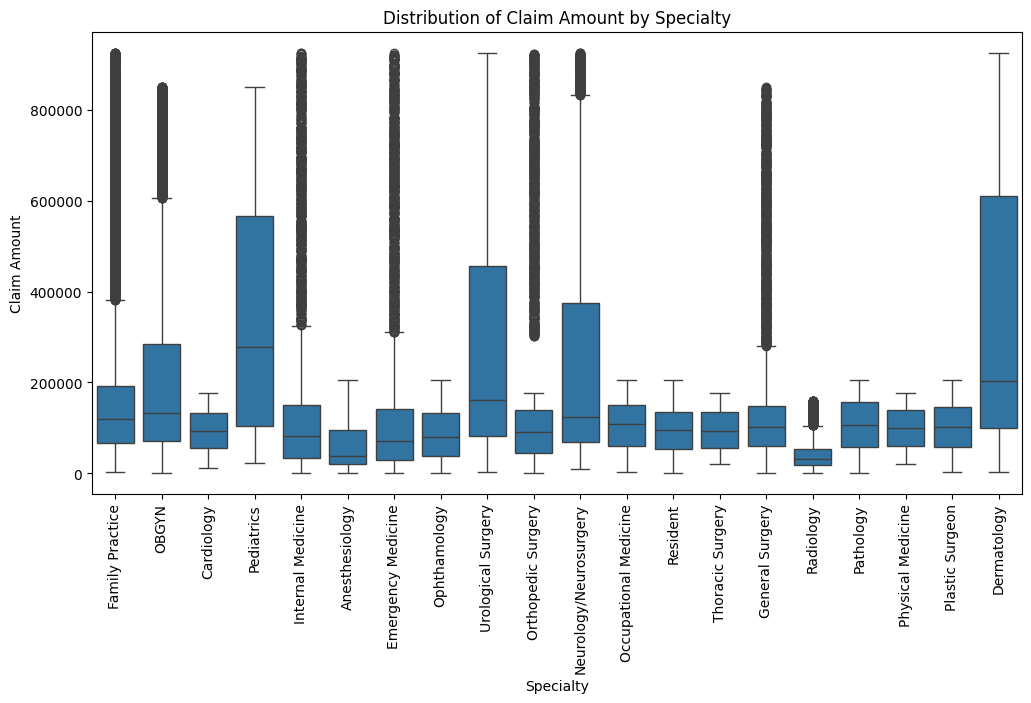

In [133]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Specialty', y='Amount', data=df)
plt.xticks(rotation=90)
plt.title("Distribution of Claim Amount by Specialty")
plt.xlabel("Specialty")
plt.ylabel("Claim Amount")
plt.show()

In [134]:
for specialty in df['Specialty'].unique():
    specialty_data = df[df['Specialty'] == specialty]['Amount']
    Q1 = specialty_data.quantile(0.25)
    Q3 = specialty_data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = specialty_data[(specialty_data > Q3 + 1.5 * (Q3 - Q1)) | (specialty_data < Q1 - 1.5 * (Q3 - Q1))]
    print(f"Specialty: {specialty}, Outliers Count: {len(outliers)}")
    print("\n")

Specialty: Family Practice, Outliers Count: 2326


Specialty: OBGYN, Outliers Count: 903


Specialty: Cardiology, Outliers Count: 0


Specialty: Pediatrics, Outliers Count: 0


Specialty: Internal Medicine, Outliers Count: 618


Specialty: Anesthesiology, Outliers Count: 0


Specialty: Emergency Medicine, Outliers Count: 644


Specialty: Ophthamology, Outliers Count: 0


Specialty: Urological Surgery, Outliers Count: 0


Specialty: Orthopedic Surgery, Outliers Count: 675


Specialty: Neurology/Neurosurgery, Outliers Count: 213


Specialty: Occupational Medicine, Outliers Count: 0


Specialty: Resident, Outliers Count: 0


Specialty: Thoracic Surgery, Outliers Count: 0


Specialty: General Surgery, Outliers Count: 728


Specialty: Radiology, Outliers Count: 257


Specialty: Pathology, Outliers Count: 0


Specialty: Physical Medicine, Outliers Count: 0


Specialty: Plastic Surgeon, Outliers Count: 0


Specialty: Dermatology, Outliers Count: 0




Base on the diagram above, as you can see there are significantly many outliers occurence in particular specialty fields like Family Practice, Internal Medicine, Emergency medicine, Orthopedic Surgery and General Surgery which might be caused by the malpractice of the physicians. We will investigate more into it through looking at the private attorneys.

<Figure size 1500x600 with 0 Axes>

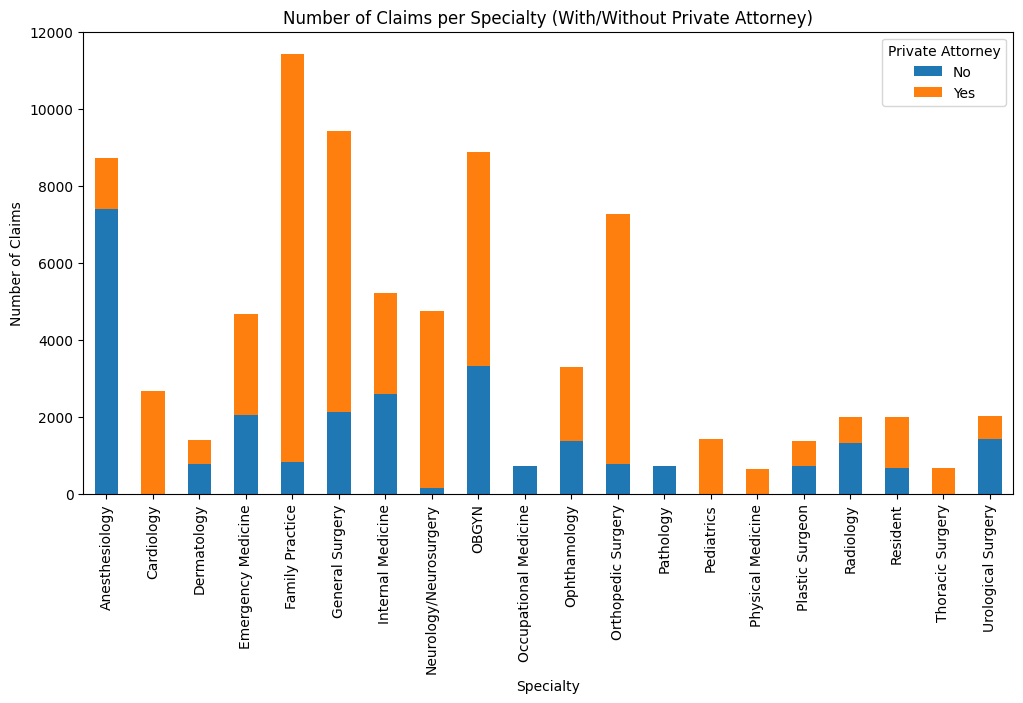

In [135]:
# Count of claims per specialty where a private attorney was involved
attorney_claims = df.groupby(['Specialty', 'Private Attorney'])['Amount'].count().unstack()
# Visualizing the count of claims with and without private attorneys per specialty
plt.figure(figsize=(15,6))
attorney_claims.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xticks(rotation=90)
plt.ylabel("Number of Claims")
plt.title("Number of Claims per Specialty (With/Without Private Attorney)")
plt.legend(title="Private Attorney", labels=["No", "Yes"])
plt.show()

As shown in the results, many specialties have more private attorneys involved than no private attorneys, especially in cardiology where there is a 100% rate of claimant hiring a private attorney. Although this result cannot conclude the practice of the physicians, it is indicating that many claimants think that they are mistreated and not getting the amount of claims that they think they deserved. 

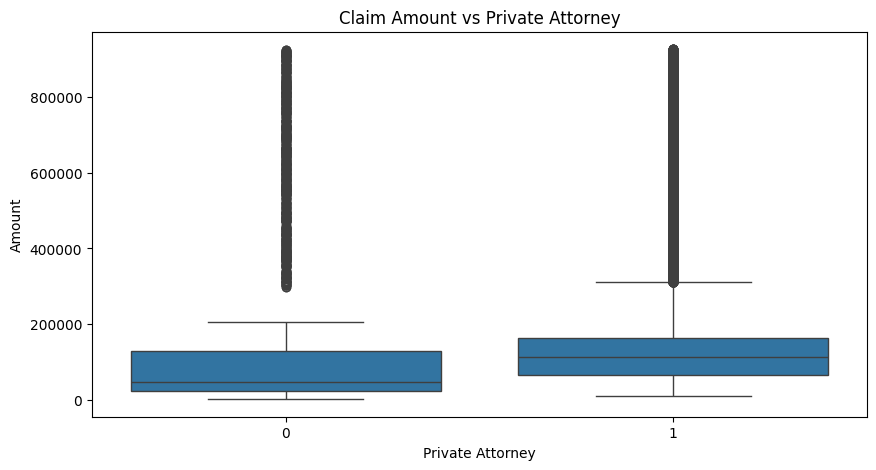

In [136]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Private Attorney', y='Amount', data=df)
plt.title('Claim Amount vs Private Attorney')
plt.show()

Private Attorney
0     629
1    9911
dtype: int64


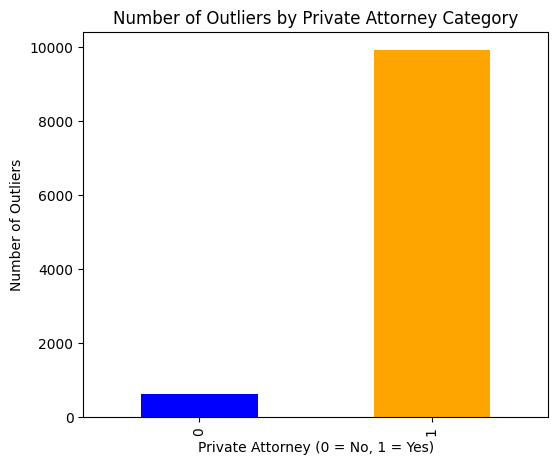

In [137]:
# Define threshold for outliers using IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

# Count outliers in each Private Attorney category
outlier_counts = outliers.groupby('Private Attorney').size()
print(outlier_counts)
# Plot the number of outliers per Private Attorney category
plt.figure(figsize=(6, 5))
outlier_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Private Attorney (0 = No, 1 = Yes)')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers by Private Attorney Category')
plt.show()

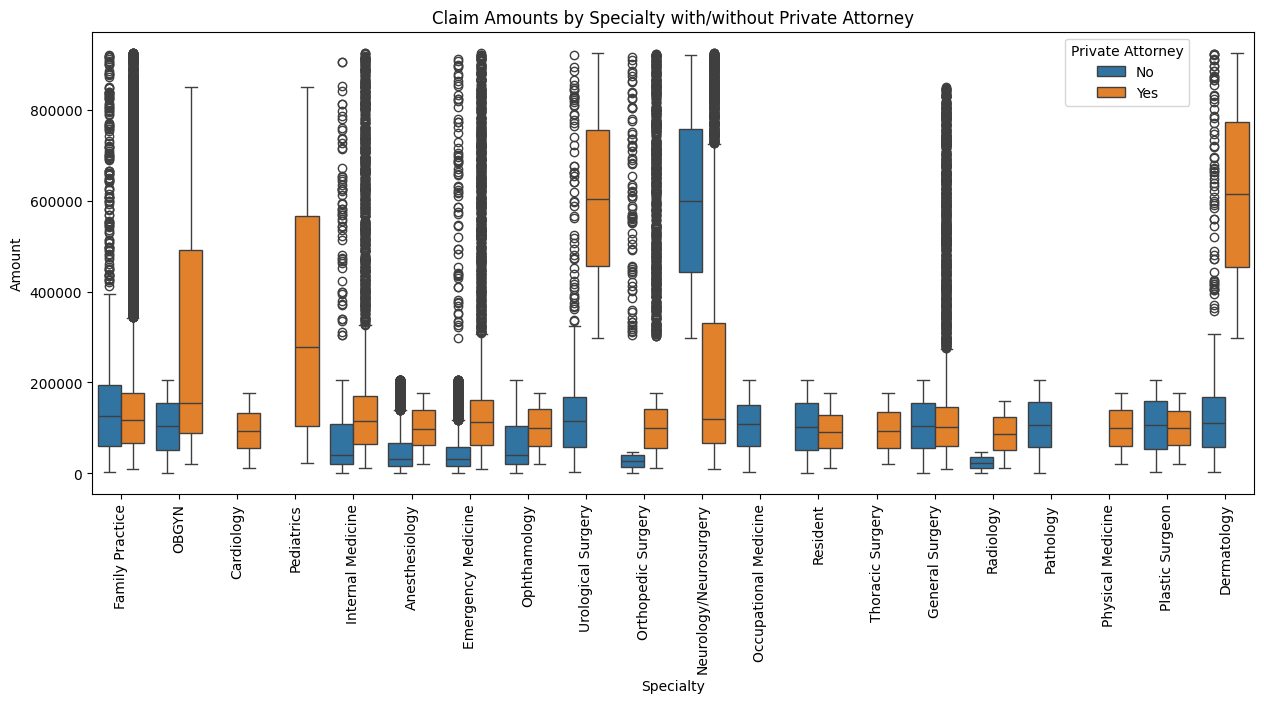

In [138]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
plt.title('Claim Amounts by Specialty with/without Private Attorney')
ax = sns.boxplot(x='Specialty', y='Amount', hue='Private Attorney', data=df)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ["No", "Yes"], title="Private Attorney",loc = "upper right",bbox_to_anchor=(0.95, 1))
plt.show()

As shown from the results above, having a Private Attorney tends to have a higher claim amount in all ways possible. As the median, the quartiles and the number of outliers claiming high amount of claimes are all higher than the patients without a private attorney. It seems convincing that many of the physicians who were in a lawsuit were involved in a malpractice. 

In [139]:
from scipy.stats import ttest_ind

attorney_yes = df[df['Private Attorney'] == 1]['Amount']
attorney_no = df[df['Private Attorney'] == 0]['Amount']

t_stat, p_value = ttest_ind(attorney_yes, attorney_no, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 93.14592314377462, P-value: 0.0


We can also carry out a t test on a null hypothesis of average claim amount of no Private Attorney is equal to the claim amount of Private Attorney, with our alternative hypothesis being the average claim amout of no Private Attorney is different from having a Private Attorney. We carry it out under a 95% Confidence interval, as p-value = 0.0 < 0.025, we reject the null hypothesis.